In [1]:
#!pip install --upgrade tensorflow

In [2]:
import tensorflow as tf
tf.__version__

'2.10.0'

In [3]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
indices =(range(len(X_train)))


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
y_test.shape

(10000,)

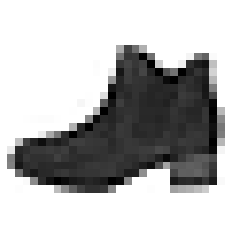

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sample_image = X_train[15]
plt.imshow(sample_image, cmap='binary')
plt.axis('off')
plt.show()

In [9]:
y_train[15]

9

In [10]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[y_train[15]])

Ankle boot



The class labels for Fashion MNIST are:
<br>
<br>
<b>Label</b> &nbsp;  <b>Description</b>
<br>
0   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   T-shirt/top
<br>
1   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Trouser
<br>
2   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Pullover
<br>
3   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Dress
<br>
4   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Coat
<br>
5   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Sandal
<br>
6   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Shirt
<br>
7   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Sneaker
<br>
8   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Bag
<br>
9   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Ankle boot
<br>

Each of the 60,000 photos in our collection includes 784 characteristics. Each of the  image is of 28x28 pixels that make up a picture has a value between 0 and 255 which indicates the intensity of that pixel. 255 indicated black and 0 indicates white.

 it can be displayed using Matplotlib’s imshow() function.

In [11]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

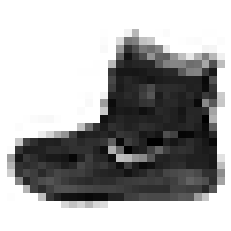

In [12]:
def display_Image(data):
    random_image = data
    random_image_image = random_image.reshape(28, 28) # Reshaping it to get the 28x28 pixels
    plt.imshow(random_image_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()
    
display_Image(X_train[0])

In [13]:
y_train[0]

9

<b> To go on to the next stage of the execution, I must shuffle the data set in order to obtain the necessary results in the training dataset and uniform samples for cross validation.</b>
<br>
<br>


<b>The numpy random seed is a numerical value that generates a new set or repeats pseudo-random numbers.<b>

In [14]:
import numpy as np
np.random.seed(7) #repeats the iteration 7 times 
my_shuffle_idx = np.random.permutation(60000) #this will make the 60,000 permutations and return a permuted range
X_train, y_train = X_train[my_shuffle_idx], y_train[my_shuffle_idx]

In [15]:
X_train = X_train.reshape(X_train.shape[0], -1) 
# reshaping the X_train data to 2 dimension as Sklearn is compatable with 2 dimension.


After shuffling, let us see what is the image at X_train[0]

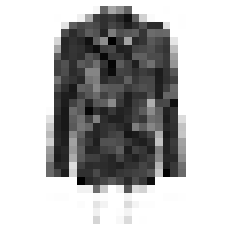

In [16]:
display_Image(X_train[0]) #we can expect an shuffled  image with this output 

<b> Feature Scaling </b>
<br>
<br>
We would need to employ <b>feature scaling<b> to apply <b>standardization to this dataset X train<b> since each picture (instance) in the dataset includes 784 pixels (features), and the values of each feature (pixel) vary from 0 to 255, which is too broad (based on the standard deviation value).
<br>
<br>
    We can use the Scalling by using the following formula:-  <br>
<b>  x_scaled = (x - x_mean) / standard deviation    </b>
<br>
<br>
<br>
<br>

<h1 align='center' style="color: black;">StandardScaler Algorithm</h1>

<b>Using the StandardScaler Algorithm it removes the mean and scales each feature/variable to unit variance.</b>

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [18]:
# Let us import some libraries that we will use quite often
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

<h1 align='center' style="color: black;">SGDClassifier</h1>


   <h6>This estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule</h6> 

In [19]:
#importing the model from Sklearn
from sklearn.linear_model import SGDClassifier

In [20]:
# Training  the model
my_sgd_clf = SGDClassifier(random_state=40) 
my_sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=40)

In [21]:
# Predicting some instance from the dataset using the above trained model
y_train_predict = my_sgd_clf.predict(X_train[0].reshape(1, -1))

In [22]:
#viewing the categorie of an image with an instance from train 
y_train[0]

4

In [23]:
#checking if the predicted is the same categorie or not 
y_train_predict[0]

4

Let us see the image at X_train[0]

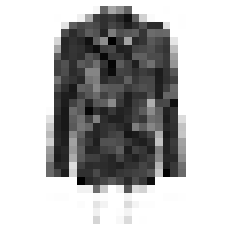

In [24]:
#viewing the image 
display_Image(X_train[0])

In [25]:
# Let us predict all instances of training dataset X_train_scaled using the above trained model
y_train_predict = my_sgd_clf.predict(X_train_scaled)

In [26]:
#Measuring the Accuracy score, Precision, Recall,F1 Score fo the trained SGDClassifier model
my_sgd_clf_accuracy = accuracy_score(y_train, y_train_predict)
my_sgd_clf_precision = precision_score(y_train, y_train_predict, average='weighted')
my_sgd_cl_frecall = recall_score(y_train, y_train_predict, average='weighted')
my_sgd_clff1_score = f1_score(y_train, y_train_predict, average='weighted')


print("SGD Accuracy: ", my_sgd_clf_accuracy)
print("SGD Precision: ", my_sgd_clf_precision)
print("SGD Recall: ", my_sgd_clf_precision)
print("SGD F1 Score: ", my_sgd_clff1_score)

SGD Accuracy:  0.2592
SGD Precision:  0.5938185124107797
SGD Recall:  0.5938185124107797
SGD F1 Score:  0.22942312051084263


### Outcomes of the SGDClassifier
<li>SGD Accuracy:  25.92%</li>
<li>SGD Precision:  59.38%</li>
<li>SGD Recall:  59.38%</li>
<li>SGD F1 Score:  22.94%</li>

<h1 align='center' style="color: black;">LogisticRegression Algorithm</h1>

<h6> Since this is <b>multi-class problem</b> (we need to predict multiple classes (0,1,2...9) for the given label), <b>hence we will use Softmax Regression</b>, which is nothing but Logistic Regression for 
multi-class classification problems</h2>

In [27]:
#importing the model from LogisticRegression

from sklearn.linear_model import LogisticRegression

In [28]:
# Training the model with scaled train dataset 
my_log_clf = LogisticRegression(multi_class="multinomial", C=10, random_state=42)
# 'C' is hyprparameter for regularizing L2
my_log_clf.fit(X_train_scaled, y_train)

D:\College Files\Data Science\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [29]:
# Predicting some instance from the dataset using the above trained model
y_train_predict = my_log_clf.predict(X_train[0].reshape(1, -1))

In [30]:
#viewing the categorie of an image with an instance from train 
y_train[0]

4

Let us see the predicted class

In [31]:
#Checking the predicted class
y_train_predict[0]

4

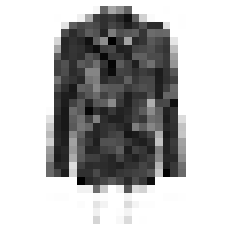

In [32]:
#viewing an image 
display_Image(X_train[0])

In [33]:
# Let us predict all instances of training dataset X_train_scaled using the above trained model
y_train_predict = my_log_clf.predict(X_train_scaled)

In [34]:
##Measuring the Accuracy score, Precision, Recall,F1 Score fo the trained LogisticRegression model

my_log_accuracy = accuracy_score(y_train, y_train_predict)
my_log_precision = precision_score(y_train, y_train_predict, average='weighted')
my_log_recall = recall_score(y_train, y_train_predict, average='weighted')
my_log_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("Logistic Accuracy: ", my_log_accuracy)
print("Logistic Precision: ", my_log_precision)
print("Logistic Recall: ", my_log_precision)
print("Logistic F1 Score: ", my_log_f1_score)

Logistic Accuracy:  0.87755
Logistic Precision:  0.8766655036582149
Logistic Recall:  0.8766655036582149
Logistic F1 Score:  0.8769448480797025


### Outcomes for the trained LogisticRegression model
<li>Logistic Accuracy:  87.75%
<li>Logistic Precision:  87.66%
<li>Logistic Recall:  87.66%
<li>Logistic F1 Score:  87.69%

<h1 align='center' style="color: black;">XGBClassifier</h1>
 <h6 align='left' style="color:grey;">Iteratively, the training process adds new trees that forecast the residuals or mistakes of older trees, which are then integrated with older trees to get the final prediction. The reason it employs a gradient descent approach to reduce the loss while introducing new models is why it is known as gradient boosting.</h3>

In [94]:
from xgboost import XGBClassifier
!pip install xgboost


In [95]:
my_xgb_clf = XGBClassifier(n_estimators=20, max_depth=10, random_state=42)
# Scaling is not needed for Decision Tree algorithm and hence for Random Forest and XGBoost algorithms as they 
# are also based on Decision Trees. Hence, not using scaled training data set here
# For max_depth parameter, typical values are between 3 to 10. We have chosen 10
my_xgb_clf.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=20, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto', ...)

In [97]:
# Let us predict some instance from the data set using the above trained model
y_train_predict = my_xgb_clf.predict(X_train[0].reshape(1, -1))

In [98]:
y_train[0]

4

In [99]:
y_train_predict[0]

4

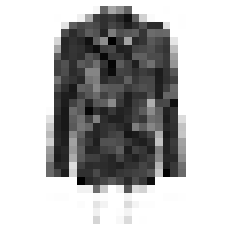

In [101]:
display_Image(X_train[0])

In [103]:
# Let us predict all instances of training dataset X_train using the above trained model
y_train_predict = my_xgb_clf.predict(X_train)

In [104]:
xgb_accuracy = accuracy_score(y_train, y_train_predict)
xgb_precision = precision_score(y_train, y_train_predict, average='weighted')
xgb_recall = recall_score(y_train, y_train_predict, average='weighted')
xgb_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("XGBoost Accuracy: ", xgb_accuracy)
print("XGBoost Precision: ", xgb_precision)
print("XGBoost Recall: ", xgb_precision)
print("XGBoost F1 Score: ", xgb_f1_score)

XGBoost Accuracy:  0.9966833333333334
XGBoost Precision:  0.9966870368429002
XGBoost Recall:  0.9966870368429002
XGBoost F1 Score:  0.9966839140153632


### Outcomes for the trained XGBoost  model
<li>XGBBoost  Accuracy:  99.66%
<li>XGBoost Precision:  99.66%
<li>XGBoost Recall:  99.66%
<li>XGBoost F1 Score: 99.66%

 <h1 align='center' style="color: black;">Naive base Algorithm</h1>
 <h6 align='left' style="color:grey;">Naive Bayes models are a type of exceptionally quick and straightforward classification techniques that are frequently appropriate for very high-dimensional datasets. In Bayesian classification, we're interested in determining the likelihood of a label given certain observed characteristics, which we may write as P(L|features). Bayes' theorem explains how to define this in terms of computation-friendly values.</h3>

In [ ]:
from sklearn.naive_bayes import GaussianNB 

In [135]:
 #fitting our data into the Model. 
my_gnb_clf.fit(X_train, y_train)
y_test_predict = my_gnb_clf.predict(X_train)

In [136]:
y_train_predict = my_gnb_clf.predict(X_train[0].reshape(1, -1))

In [137]:
y_train[0]

4

In [138]:
y_train_predict[0]

4

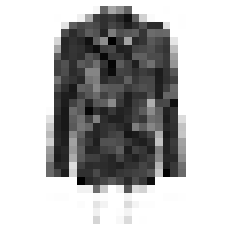

In [139]:
display_Image(X_train[0])

In [141]:
y_train_predict = my_gnb_clf.predict(X_train)

In [145]:
gnb_accuracy = accuracy_score(y_train, y_train_predict)
gnb_precision = precision_score(y_train, y_train_predict, average='weighted')
gnb_recall = recall_score(y_train, y_train_predict, average='weighted')
gnb_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("GNB Model  Accuracy: ", gnb_accuracy)
print("GNB Precision: ", gnb_precision)
print("GNB Recall: ", gnb_precision)
print("GNB F1 Score: ", gnb_f1_score)

GNB Model  Accuracy:  0.5877833333333333
GNB Precision:  0.6398644002301637
GNB Recall:  0.6398644002301637
GNB F1 Score:  0.5584499824115575


## Outcomes for the trained Naive bayes Algorithm
<li>GNB Model  Accuracy:  0.5877833333333333
<li>GNB Precision:  0.6398644002301637
<li>GNB Recall:  0.6398644002301637
<li>GNB F1 Score:  0.5584499824115575

### K-Nearest Neighbors

In [120]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
my_knn_clf = KNeighborsClassifier()
my_knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [129]:
y_train_predict = my_knn_clf.predict(X_train[0].reshape(1, -1))

In [130]:
y_train[0]

4

In [131]:
y_train_predict[0]

4

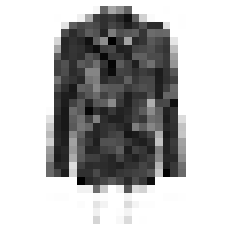

In [132]:
display_Image(X_train[0])

In [133]:
y_train_predict = my_knn_clf.predict(X_train)

In [134]:
knn_accuracy = accuracy_score(y_train, y_train_predict)
knn_precision = precision_score(y_train, y_train_predict, average='weighted')
knn_recall = recall_score(y_train, y_train_predict, average='weighted')
knn_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("Knn Accuracy: ", knn_accuracy)
print("Knn Precision: ", knn_precision)
print("KnnRecall: ", knn_precision)
print("Knn F1 Score: ", knn_f1_score)

Knn Accuracy:  0.8997666666666667
Knn Precision:  0.9013075462000932
KnnRecall:  0.9013075462000932
Knn F1 Score:  0.8991576200372283


### Outcomes for the trained Decision Tree Classifier
<li>KNeighborsClassifier Accuracy:  89.97%
<li>KNeighborsClassifier Precision:  90.13%
<li>KNeighborsClassifierRecall:  90.13%
<li>KNeighborsClassifier F1 Score:  89.91%

 <h1 align='center' style="color: black;">DecisionTreeClassifier Algorithm</h1>
 <h6 align='left' style="color:grey;">A decision tree creates tree-like models for classification or regression. It progressively develops an associated decision tree while segmenting my dataset into smaller and smaller sections. The outcome is a tree containing leaf nodes and decision nodes.</h3>

In [35]:
##importing the model from DecisionTreeClassifier model
from sklearn.tree import DecisionTreeClassifier

<b>Scaling is not needed for <i>Decision Tree</i> algorithm so I shall directly use the Train dataset </b>

In [36]:
#Training the DecisionTreeClassifier model with train data set 
my_dec_tree_clf = DecisionTreeClassifier(max_depth=50, random_state=42)
my_dec_tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=50, random_state=42)

In [37]:
# Let us predict some instance from the dataset using the above trained model
y_train_predict = my_dec_tree_clf.predict(X_train[0].reshape(1, -1))

In [38]:
#Checking the train instance data categorie
y_train[0]

4

Let us see the predicted class

In [39]:
#Checking if the predicted is the same categorie or not 
y_train_predict[0]

4

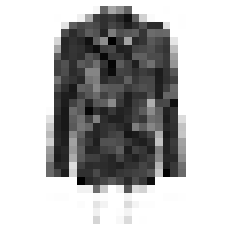

In [40]:
display_Image(X_train[0])

In [41]:
# Let us predict all instances of training dataset X_train using the above trained model
y_train_predict = my_dec_tree_clf.predict(X_train)

In [42]:
##Measuring the Accuracy score, Precision, Recall,F1 Score fo the trained DecisionTreeClassifier model

my_dec_tree_accuracy = accuracy_score(y_train, y_train_predict)
my_dec_tree_precision = precision_score(y_train, y_train_predict, average='weighted')
my_dec_tree_recall = recall_score(y_train, y_train_predict, average='weighted')
my_dec_tree_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("Decision Tree Accuracy: ", my_dec_tree_accuracy)
print("Decision Tree Precision: ", my_dec_tree_precision)
print("Decision Tree Recall: ", my_dec_tree_precision)
print("Decision Tree F1 Score: ", my_dec_tree_f1_score)

Decision Tree Accuracy:  1.0
Decision Tree Precision:  1.0
Decision Tree Recall:  1.0
Decision Tree F1 Score:  1.0


### Outcomes for the trained Decision Tree Classifier
<li>DecisionTreeClassifier Accuracy: 100%  
<li>DecisionTreeClassifier Precision: 100%
<li>DecisionTreeClassifier Recall: 100%
<li>DecisionTreeClassifier F1 Score: 100%

 <h1 align='center' style="color: black;">RandomForestClassifier Algorithm</h1>
 <h6 align='left' style="color:grey;">Instead of depending on a single decision tree, the random forest considers the forecast from each tree and guesses the result based on the predictions that have received the most votes. An increase in accuracy and a solution to the overfitting issue are provided by the larger number of trees in the forest..</h3>

In [43]:
##importing the model from RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [44]:
##Training the RandomForestClassifier model with training Dataset. 

my_rnd_clf = RandomForestClassifier()
# Scaling is not needed for Decision Tree algorithm and hence for Random Forest and ADABoost algorithms as they 
# are also based on Decision Trees. Hence, not using scaled training dataset here
my_rnd_clf.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
# Predicting some instances after reshaping .
y_train_predict = my_rnd_clf.predict(X_train[0].reshape(1, -1))

In [46]:
#Picking  an instance categorie 
y_train[0]

4

In [47]:
#Checking if the predicted is the same as the trained
y_train_predict[0]

4

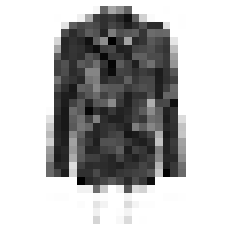

In [48]:
#Viewing at image 
display_Image(X_train[0])

In [49]:
# Predicting all instances of training dataset X_train using the above trained RandomForestClassifier model
y_train_predict = my_rnd_clf.predict(X_train)

In [50]:
#Measuring the Accuracy score, Precision, Recall,F1 Score fo the trained RandomForestClassifier model

rnd_accuracy = accuracy_score(y_train, y_train_predict)
rnd_precision = precision_score(y_train, y_train_predict, average='weighted')
rnd_recall = recall_score(y_train, y_train_predict, average='weighted')
rnd_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("Random Forest Accuracy: ", rnd_accuracy)
print("Random Forest Precision: ", rnd_precision)
print("Random Forest Recall: ", rnd_precision)
print("Random Forest F1 Score: ", rnd_f1_score)

Random Forest Accuracy:  1.0
Random Forest Precision:  1.0
Random Forest Recall:  1.0
Random Forest F1 Score:  1.0


### Outcomes of the trained RandomForestClassifier
<li>Random Forest Accuracy:  100%
<li>Random Forest Precision:  100%
<li>Random Forest Recall:  100%
<li>Random Forest F1 Score:  100%

 <h1 align='center' style="color: black;">VotingClassifier Algorithm</h1>
 <h6 align='left' style="color:grey;">A voting classifier is a type of machine learning estimator that trains several base models or estimators and makes predictions based on averaging the results of each base estimator. Each estimator's output can be voted on using the aggregating criteria jointly..</h3>

In [51]:
#Importing the VotingClassifier model
from sklearn.ensemble import VotingClassifier

In [52]:
#Training the Model by giving the LogisticRegression & RandomForestClassifier data as parameters. 

my_log_clf_ens = LogisticRegression(multi_class="multinomial", C=5, random_state=42)
my_rnd_clf_ens = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=42)

my_voting_clf = VotingClassifier(
    estimators=[('lr', my_log_clf_ens), ('rf', my_rnd_clf_ens)],
    voting='soft')

my_voting_clf.fit(X_train_scaled, y_train)

D:\College Files\Data Science\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=5, multi_class='multinomial',
                                                 random_state=42)),
                             ('rf',
                              RandomForestClassifier(max_depth=50,
                                                     random_state=42))],
                 voting='soft')

In [53]:
# Let us predict some instance from the data set using the above trained model
y_train_predict = my_voting_clf.predict(X_train[0].reshape(1, -1))

In [54]:
##Picking  an instance categorie 
y_train[0]

4

In [55]:
##Checking if the predicted is the same as the trained
y_train_predict[0]

4

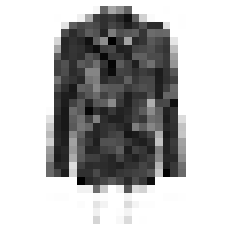

In [56]:
#viewing the image 
display_Image(X_train[0])

In [57]:
# Let us predict all instances of training dataset X_train_scaled using the above trained model
y_train_predict = my_voting_clf.predict(X_train_scaled)

In [58]:
#Measuring the Accuracy score, Precision, Recall,F1 Score fo the trained VotingClassifier model

voting_accuracy = accuracy_score(y_train, y_train_predict)
voting_precision = precision_score(y_train, y_train_predict, average='weighted')
voting_recall = recall_score(y_train, y_train_predict, average='weighted')
voting_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("VotingClassifier model Accuracy: ", voting_accuracy)
print("VotingClassifier model Precision: ", voting_precision)
print("VotingClassifier model Recall: ", voting_precision)
print("VotingClassifier model F1 Score: ", voting_f1_score)

VotingClassifier model Accuracy:  0.96445
VotingClassifier model Precision:  0.9645124214818526
VotingClassifier model Recall:  0.9645124214818526
VotingClassifier model F1 Score:  0.9643190362267164


### Outcomes of the trained RandomForestClassifier model
<li>VotingClassifier model Accuracy:  96.44%
<li>VotingClassifier model Precision:  96.45%
<li>VotingClassifier model Recall:  96.45%
<li>VotingClassifier model F1 Score:  96.43%

<h1 align='center' style="color: black;">ADABoostClassifier Algorithm</h1>
 <h6 align='left' style="color:grey;">To improve classifier accuracy, it combines many classifiers. An iterative ensemble algorithm is AdaBoost. AdaBoost classifier combines a number of ineffective classifiers to create a powerful classifier that has a high degree of accuracy.</h3>

In [59]:
#importing the ADABoostClassifier algorithm. 
from sklearn.ensemble import AdaBoostClassifier

In [60]:
#Training the ADABoostCkassifier with the Training data set 
my_ada_clf = AdaBoostClassifier()
my_ada_clf.fit(X_train, y_train)

AdaBoostClassifier()

In [61]:
# Let us predict some instance from the data set using the above trained model
y_train_predict = my_ada_clf.predict(X_train[0].reshape(1, -1))

In [62]:
#Picking an Instance to check the categorie
y_train[0]

4

In [63]:
#Try checking if the  Predicted categorie is the same or not 
y_train_predict[0]

4

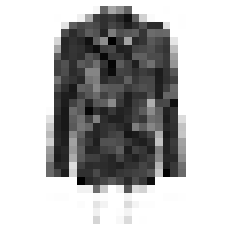

In [64]:
#Viewing the image
display_Image(X_train[0])

In [65]:
y_train_predict = my_ada_clf.predict(X_train)

In [66]:
#Measuring the Accuracy score, Precision, Recall,F1 Score fo the trained AdaBoostClassifier model. 

my_ada_accuracy = accuracy_score(y_train, y_train_predict)
my_ada_precision = precision_score(y_train, y_train_predict, average='weighted')
my_ada_recall = recall_score(y_train, y_train_predict, average='weighted')
my_ada_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("ADAboost Accuracy: ", my_ada_accuracy)
print("ADAboost Precision: ", my_ada_precision)
print("ADAboost Recall: ", my_ada_precision)
print("ADAboost F1 Score: ", my_ada_f1_score)

ADAboost Accuracy:  0.5496333333333333
ADAboost Precision:  0.5675125050386447
ADAboost Recall:  0.5675125050386447
ADAboost F1 Score:  0.5242587064936796


### Outcomes of the trained AdaBoostClassifier Model
<li>AdaBoostClassifier Accuracy: 54.96%  
<li>AdaBoostClassifier Precision: 56.75%
<li>AdaBoostClassifier Recall: 56.75%
<li>AdaBoostClassifier F1 Score: 52.42%

## Application of Cross Validatiaon on the models 
Now, i shall try using  <b>cross validation</b> to find the proper score of each model, also to ensure that the model is not <i>overfitting</i> or <i>underfitting</i> while prediction. 
<br>
<br>
<br>
<b>We may state that a model is not overfitting if the cross validation score values for a performance metric, such accuracy, do not differ significantly across different folds (k-folds).</b>.
<br>
<b>The model is not underfitting if the cross validation score values for a performance measure—say let's accuracy—are not particularly low for different folds (k-folds).
<br>
<br>
<b>k-fold cross-validation</b>
<br>
will at random divide the training set into three separate subsets known as folds (cv=3). We are restricting "cv" (the number of folds) to 3 instead of the usual 10 folds since cross validation is a computationally costly and time-consuming operation..
<br>
Then, after training on the other 2 folds twice, each model will be evaluated three times while being tested on a separate fold
<br>
An array comprising the three assessment scores for each of the measurements (accuracy, precision, and F1 score) will be the end product.
<br>
We will use <b>cross_val_score()</b> function to calculate <b>accuracy</b>
<br>
 <b>But accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed datasets.</b>
 <br>
A dataset is said to be skewed when some classes are much more frequent than others.
<br>
Even if the current training dataset may not be skewed, the future test dataset (live) on which the model runs
can be skewed, hence, <b>considering we may get skewed dataset in future, let us calculate Precision, Recall and F1 score also for the models.</b>
<br>
And will use <b>cross_val_predict()</b> function to create <b>confusion matrix</b> to calculate <b>Precision, Recall and F1 score</b>
<br>


In [67]:
# function to calculate mean and standard deviation of each score (e.g. accuracy, precision, etc.)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [68]:
#Importing the Cross Validation Score, Confusion Matrix, AUC Score, ROC Curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Applying the Crossvalidation Method over the SGDClassifier


In [69]:
#Check the reports for the SGDClassifier using the Crossvalidation(3 levels)  Method by taking 
sgd_scores = cross_val_score(my_sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy") 
display_scores(sgd_scores)
sgd_accuracy = sgd_scores.mean()

y_train_pred = cross_val_predict(my_sgd_clf, X_train_scaled, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)
sgd_precision = precision_score(y_train, y_train_pred, average='weighted')
sgd_recall = recall_score(y_train, y_train_pred, average='weighted')
sgd_f1_score = f1_score(y_train, y_train_pred, average='weighted')

print("SGD CV Accuracy: ", sgd_accuracy)
print("SGD CV Precision: ", sgd_precision)
print("SGD CV Recall: ", sgd_precision)
print("SGD CV F1 Score: ", sgd_f1_score)

D:\College Files\Data Science\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
D:\College Files\Data Science\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
D:\College Files\Data Science\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Scores: [0.83595 0.8338  0.83525]
Mean: 0.835
Standard deviation: 0.0008953584012375535


D:\College Files\Data Science\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
D:\College Files\Data Science\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGD CV Accuracy:  0.835
SGD CV Precision:  0.8348076789950156
SGD CV Recall:  0.8348076789950156
SGD CV F1 Score:  0.8345684090866138


D:\College Files\Data Science\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


### Outcomes of the trained SGDClassifier CV using the Crossvalidation Method
<li>SGDClassifier CV Accuracy:  83.5%
<li>SGDClassifier CV Precision:  83.48%
<li>SGDClassifier CV Recall:  83.48%
<li>SGDClassifier CV F1 Score:  83.45%

### Applying the Crossvalidation Menthod over Logistic Regression

In [70]:
#Check the reports for the Logistic Regression using the Crossvalidation(3 levels)  Method by taking 
log_scores = cross_val_score(my_log_clf, X_train_scaled, y_train, cv=3, scoring="accuracy") 
display_scores(log_scores)
log_accuracy = log_scores.mean()

y_train_pred = cross_val_predict(my_log_clf, X_train_scaled, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)
log_precision = precision_score(y_train, y_train_pred, average='weighted')
log_recall = recall_score(y_train, y_train_pred, average='weighted')
log_f1_score = f1_score(y_train, y_train_pred, average='weighted')

print("Logistic CV Accuracy: ", log_accuracy)
print("Logistic CV Precision: ", log_precision)
print("Logistic CV Recall: ", log_precision)
print("Logistic CV F1 Score: ", log_f1_score)

D:\College Files\Data Science\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\College Files\Data Science\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Scores: [0.84715 0.8485  0.84755]
Mean: 0.8477333333333333
Standard deviation: 0.0005661762583821269


D:\College Files\Data Science\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\College Files\Data Science\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Logistic CV Accuracy:  0.8477333333333333
Logistic CV Precision:  0.8465568032729848
Logistic CV Recall:  0.8465568032729848
Logistic CV F1 Score:  0.8469655872037553


D:\College Files\Data Science\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Outcomes of the trained Logistic Regression CV using the Crossvalidation Method
<li>Logistic Regression CV Accuracy:  84.77%
<li>Logistic Regression CV Precision:  84.65%
<li>Logistic Regression CV Recall:  84.65%
<li>Logistic Regression CV F1 Score:  84.69%

### Applying the Crossvalidation Menthod over trained DecissionTree

In [71]:
# Scaled Features not required for Decision Tree
dec_tree_scores = cross_val_score(my_dec_tree_clf, X_train, y_train, cv=3, scoring="accuracy") 
display_scores(dec_tree_scores)
dec_tree_accuracy = dec_tree_scores.mean()

y_train_pred = cross_val_predict(my_dec_tree_clf, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)
dec_tree_precision = precision_score(y_train, y_train_pred, average='weighted')
dec_tree_recall = recall_score(y_train, y_train_pred, average='weighted')
dec_tree_f1_score = f1_score(y_train, y_train_pred, average='weighted')

print("Decision Tree CV Accuracy: ", dec_tree_accuracy)
print("Decision Tree CV Precision: ", dec_tree_precision)
print("Decision Tree CV Recall: ", dec_tree_precision)
print("Decision Tree CV F1 Score: ", dec_tree_f1_score)

Scores: [0.78945 0.79395 0.78955]
Mean: 0.7909833333333335
Standard deviation: 0.0020981473309141926
Decision Tree CV Accuracy:  0.7909833333333335
Decision Tree CV Precision:  0.7917249861380651
Decision Tree CV Recall:  0.7917249861380651
Decision Tree CV F1 Score:  0.7913335295225672


### Outcomes of the trained Decision Tree Classifier CV using the Crossvalidation Method
<li>Decision Tree CV Accuracy:  79.09%
<li>Decision Tree CV Precision:  79.17%
<li>Decision Tree CV Recall:  79.17%
<li>Decision Tree CV F1 Score:  7913%

### Applying the Crossvalidation Menthod over Random Forest Algorithm 

In [72]:
# Scaled features not required for Random Forest (as it is based on Decision Trees)

rnd_scores = cross_val_score(my_rnd_clf, X_train, y_train, cv=3, scoring="accuracy") 
display_scores(rnd_scores)
rnd_accuracy = rnd_scores.mean()

y_train_pred = cross_val_predict(my_rnd_clf, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)
rnd_precision = precision_score(y_train, y_train_pred, average='weighted')
rnd_recall = recall_score(y_train, y_train_pred, average='weighted')
rnd_f1_score = f1_score(y_train, y_train_pred, average='weighted')

print("Random Forest CV Accuracy: ", rnd_accuracy)
print("Random Forest CV Precision: ", rnd_precision)
print("Random Forest CV Recall: ", rnd_precision)
print("Random Forest CV F1 Score: ", rnd_f1_score)

Scores: [0.87915 0.8811  0.8797 ]
Mean: 0.8799833333333335
Standard deviation: 0.0008209073570683142
Random Forest CV Accuracy:  0.8799833333333335
Random Forest CV Precision:  0.8778753197840411
Random Forest CV Recall:  0.8778753197840411
Random Forest CV F1 Score:  0.8772872513360658


### Outcomes of the trained RandomForest CV using the Crossvalidation Method
<li>RandomForest CV Accuracy:  87.92%
<li>RandomForest CV Precision:  87.87%
<li>RandomForest CV Recall:  87.87%
<li>RandomForest CV F1 Score:  87.80%

### Applying the Crossvalidation Method over  Voting Classifier

In [73]:
voting_scores = cross_val_score(my_voting_clf, X_train_scaled, y_train, cv=3, scoring="accuracy") 
display_scores(voting_scores)
voting_accuracy = voting_scores.mean()

y_train_pred = cross_val_predict(my_voting_clf, X_train_scaled, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)
voting_precision = precision_score(y_train, y_train_pred, average='weighted')
voting_recall = recall_score(y_train, y_train_pred, average='weighted')
voting_f1_score = f1_score(y_train, y_train_pred, average='weighted')

print("Voting CV Accuracy: ", voting_accuracy)
print("Voting CV Precision: ", voting_precision)
print("Voting CV Recall: ", voting_precision)
print("Voting CV F1 Score: ", voting_f1_score)

D:\College Files\Data Science\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\College Files\Data Science\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Scores: [0.87305 0.8715  0.8722 ]
Mean: 0.8722500000000001
Standard deviation: 0.0006337717780610284


D:\College Files\Data Science\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\College Files\Data Science\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Voting CV Accuracy:  0.8722500000000001
Voting CV Precision:  0.870910016191056
Voting CV Recall:  0.870910016191056
Voting CV F1 Score:  0.8710363351083469


### Outcomes of the trained Voting CV  using the Crossvalidation Method
<li>Voting CV  Accuracy:  86.42%
<li>Voting CV  Precision:  86.26%
<li>Voting CV  Recall:  86.26%
<li>Voting CV  F1 Score:  86.26%

### Applying Crossvalidation over Trained ADABoost Classifier

In [74]:
# Scaled features not required for ADABoost (as it is based on Decision Trees)
ada_scores = cross_val_score(my_ada_clf, X_train, y_train, cv=3, scoring="accuracy") 
display_scores(ada_scores)
ada_accuracy = ada_scores.mean()

y_train_pred = cross_val_predict(my_ada_clf, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)
ada_precision = precision_score(y_train, y_train_pred, average='weighted')
ada_recall = recall_score(y_train, y_train_pred, average='weighted')
ada_f1_score = f1_score(y_train, y_train_pred, average='weighted')

print("ADABoost CV Accuracy: ", ada_accuracy)
print("ADABoost CV Precision: ", ada_precision)
print("ADABoost CV Recall: ", ada_precision)
print("ADABoost CV F1 Score: ", ada_f1_score)

Scores: [0.293   0.49305 0.5579 ]
Mean: 0.44798333333333334
Standard deviation: 0.11274234884116181
ADABoost CV Accuracy:  0.44798333333333334
ADABoost CV Precision:  0.5231169469306339
ADABoost CV Recall:  0.5231169469306339
ADABoost CV F1 Score:  0.4398264557569655


### Outcomes of the trained ADABoost  CV using the Crossvalidation Method
<li>ADABoost  CV Accuracy:  44.79%
<li>ADABoost  CV Precision:  52.31%
<li>ADABoost  CV Recall:  52.31%
<li>ADABoost  CV F1 Score:  43.98%

### Application of Crossvalidation Over the trained KNN model 


In [147]:
knn_scores = cross_val_score(my_knn_clf, X_train, y_train, cv=3, scoring="accuracy") 
display_scores(knn_scores)
knn_accuracy = knn_scores.mean()

y_train_pred = cross_val_predict(my_knn_clf, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)
knn_precision = precision_score(y_train, y_train_pred, average='weighted')
knn_recall = recall_score(y_train, y_train_pred, average='weighted')
knn_f1_score = f1_score(y_train, y_train_pred, average='weighted')

print("KNeighborsClassifier CV Accuracy: ", knn_accuracy)
print("KNeighborsClassifier CV Precision: ", knn_precision)
print("KNeighborsClassifier CV Recall: ", knn_precision)
print("KNeighborsClassifier CV F1 Score: ", knn_f1_score)

Scores: [0.851   0.85185 0.84955]
Mean: 0.8508
Standard deviation: 0.0009495613022162594
KNeighborsClassifier CV Accuracy:  0.8508
KNeighborsClassifier CV Precision:  0.8536826242949217
KNeighborsClassifier CV Recall:  0.8536826242949217
KNeighborsClassifier CV F1 Score:  0.8500634135984905


### Outcomes of the Crossvalidation with KNeighborsClassifier
<li>KNeighborsClassifier CV Accuracy: 85.08%
<li>KNeighborsClassifier CV Precision: 85.36%
<li>KNeighborsClassifier CV Recall: 85.36%
<li>KNeighborsClassifier CV F1 Score: 85%

### Application of Crossvalidation Over the trained XGBBoost 

In [148]:
xgb_scores = cross_val_score(my_xgb_clf, X_train, y_train, cv=3, scoring="accuracy") 
display_scores(xgb_scores)
xgb_accuracy = xgb_scores.mean()

y_train_pred = cross_val_predict(my_xgb_clf, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)
xgb_precision = precision_score(y_train, y_train_pred, average='weighted')
xgb_recall = recall_score(y_train, y_train_pred, average='weighted')
xgb_f1_score = f1_score(y_train, y_train_pred, average='weighted')

print("XGBoostClassifier  CV Accuracy: ", xgb_accuracy)
print("XGBoostClassifier  CV Precision: ", xgb_precision)
print("XGBoostClassifier  CV Recall: ", xgb_precision)
print("XGBoostClassifier  CV F1 Score: ", xgb_f1_score)

Scores: [0.8844  0.8829  0.88325]
Mean: 0.8835166666666666
Standard deviation: 0.00064074609289135
XGBoostClassifier  CV Accuracy:  0.8835166666666666
XGBoostClassifier  CV Precision:  0.8826583260506611
XGBoostClassifier  CV Recall:  0.8826583260506611
XGBoostClassifier  CV F1 Score:  0.8826550597453623


### Outcomes of the Crossvalidation with XGBoost
<li>XGBoostClassifier  CV Accuracy: 88.35%
<li>XGBoostClassifier  CV Precision:  0.8826583260506611
<li>XGBoostClassifier  CV Recall:  0.8826583260506611
<li>XGBoostClassifier  CV F1 Score:  0.8826550597453623
    

### Overview of all the classifiers
#### <li>SGDClassifier CV Accuracy: 83.5%
#### <li>Logistic Regression CV Accuracy: 84.77%
#### <li>Decision Tree CV Accuracy: 79.09%
#### <li>RandomForest CV Accuracy: 87.92%
#### <li>Voting CV Accuracy: 86.42%
#### <li>ADABoost CV Accuracy: 44.79%
#### <li>XGBoostClassifier CV Accuracy: 88.35%
#### <li>KNeighborsClassifier CV Accuracy: 85.08%

<b>Finally, I can conclude that XGBoostClassifier performance is the best for this problem, hence, we select XGBClassifier as our final model and will proceed with fine-tuning the same and on the later part we can apply it to the New images dataset . </b>.
<br>

In [176]:
#Task 2 

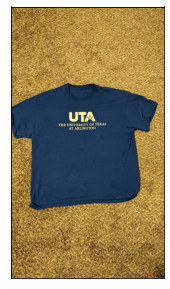

(1600, 900, 3)


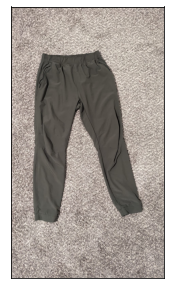

(1600, 900, 3)


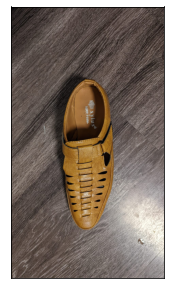

(1600, 900, 3)


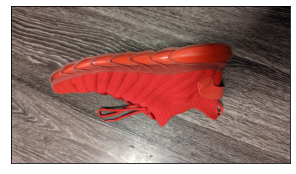

(900, 1600, 3)


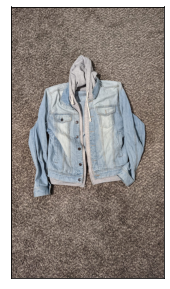

(1600, 900, 3)


In [175]:
import numpy as np 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

#Reading five images taken
Shirt=np.array(mpimg.imread("tshirt.jpeg"))
Trouser=np.array(mpimg.imread("trouser.jpeg"))
Sandal=np.array(mpimg.imread("sandle.jpeg"))
Sneaker=np.array(mpimg.imread("sneaker.jpeg"))
Jacket=np.array(mpimg.imread("jacket.jpeg"))

fig, ax= plt.subplots(figsize=(5,5))
ax.imshow(Shirt)
ax.set(xticks=[], yticks=[])
plt.show()
print(Shirt.shape)

fig, ax= plt.subplots(figsize=(5,5))
ax.imshow(Trouser)
ax.set(xticks=[], yticks=[])
plt.show()
print(Trouser.shape)

fig, ax= plt.subplots(figsize=(5,5))
ax.imshow(Sandal)
ax.set(xticks=[], yticks=[])
plt.show()
print(Sandal.shape)

fig, ax= plt.subplots(figsize=(5,5))
ax.imshow(Sneaker)
ax.set(xticks=[], yticks=[])
plt.show()
print(Sneaker.shape)

fig, ax= plt.subplots(figsize=(5,5))
ax.imshow(Jacket)
ax.set(xticks=[], yticks=[])
plt.show()
print(Jacket.shape)


In [197]:
from PIL import Image
import glob

image_ls=[] #creating image list
resized_ls=[] #creating resized image list       

for each in glob.glob("*.jpeg"):
    Img=Image.open(each)
    image_ls.append(Img) #appending all the images to image list
    
print(image_ls)

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=900x1600 at 0x233497DB9D0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=900x1600 at 0x2334987CCD0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1600x900 at 0x233497ED070>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=900x1600 at 0x23349907D30>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=900x1600 at 0x23349940580>]


In [217]:
gray_image_array = np.array(gray_images) #converting the list to array

gray_image_array.shape

C:\Users\Bhargav Ram\AppData\Local\Temp\ipykernel_37696\613707.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  gray_image_array = np.array(gray_images) #converting the list to array


(5,)

In [222]:
for image in image_ls:
    image.show()
    image=image.resize((28,28))
    resized_ls.append(image) #appending all the resized images to resized image list
    
print(resized_ls)

[<PIL.Image.Image image mode=RGB size=28x28 at 0x2334DC93DC0>, <PIL.Image.Image image mode=RGB size=28x28 at 0x2334E04D370>, <PIL.Image.Image image mode=RGB size=28x28 at 0x2334E04D1C0>, <PIL.Image.Image image mode=RGB size=28x28 at 0x2334E04D5E0>, <PIL.Image.Image image mode=RGB size=28x28 at 0x2334E04D400>, <PIL.Image.Image image mode=RGB size=28x28 at 0x2334D9265E0>, <PIL.Image.Image image mode=RGB size=28x28 at 0x2334E04D490>, <PIL.Image.Image image mode=RGB size=28x28 at 0x2334E04D280>, <PIL.Image.Image image mode=RGB size=28x28 at 0x2334E04D910>, <PIL.Image.Image image mode=RGB size=28x28 at 0x2334E04D700>, <PIL.Image.Image image mode=RGB size=28x28 at 0x2334DFCA580>, <PIL.Image.Image image mode=RGB size=28x28 at 0x2334DFCADF0>, <PIL.Image.Image image mode=RGB size=28x28 at 0x2334DBEF3D0>, <PIL.Image.Image image mode=RGB size=28x28 at 0x2334DBB6CD0>, <PIL.Image.Image image mode=RGB size=28x28 at 0x2334E04DCD0>]


In [223]:
for (i, j) in enumerate (resized_ls):
    j.save('{}{}{}'.format('./image',i+1,'.jpeg')) #renaming the resized images and storing them in one single file

In [224]:
#Reading the images
image1=np.array(mpimg.imread("image1.jpeg"))
image2=np.array(mpimg.imread("image2.jpeg"))
image3=np.array(mpimg.imread("image3.jpeg"))
image4=np.array(mpimg.imread("image4.jpeg"))
image5=np.array(mpimg.imread("image5.jpeg"))

In [225]:
from skimage import color
from skimage import io

grayimage1 = color.rgb2gray(io.imread('image1.jpeg'))
grayimage2 = color.rgb2gray(io.imread('image2.jpeg'))
grayimage3 = color.rgb2gray(io.imread('image3.jpeg'))
grayimage4 = color.rgb2gray(io.imread('image4.jpeg'))
grayimage5 = color.rgb2gray(io.imread('image5.jpeg'))

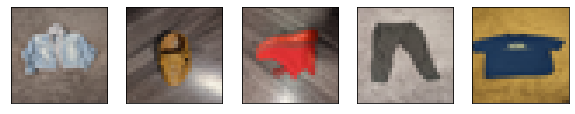

In [226]:
fig, ax = plt.subplots(1,5,figsize=(10,10))
for i, j in enumerate(ax.flat):
    j.imshow(resized_ls[i], cmap='binary')
    j.set(xticks=[],yticks=[])

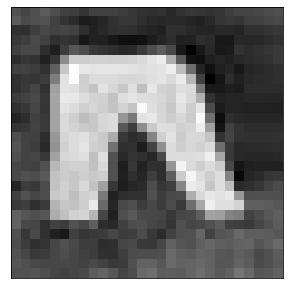

(28, 28)

In [255]:
#verifying the shape of one image if it is 28 * 28 
fig, ax= plt.subplots(figsize=(5,5))
ax.imshow(grayimage4, cmap='binary')
ax.set(xticks=[], yticks=[])
plt.show()
grayimage4.shape

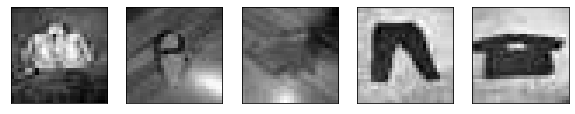

In [256]:
#creating one list to store all five gray images to pass through the models
grayimages=[] #empty list
grayimages.append(grayimage1)
grayimages.append(grayimage2)
grayimages.append(grayimage3)
grayimages.append(grayimage4)
grayimages.append(grayimage5)

fig, ax=plt.subplots(1,5,figsize=(10,10))
for i, j in enumerate(ax.flat):
    j.imshow(grayimages[i], cmap='gray')
    j.set(xticks=[],yticks=[])

In [257]:
grayimage_array = np.array(grayimages) #converting the list to array

grayimage_array.shape

(5, 28, 28)

In [258]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

grayimage_array = grayimage_array.reshape(5, 28*28)
print(grayimage_array.shape)

(5, 784)


In [259]:
#Normalizing the array to have uniform values

grayimage_array = tf.cast(grayimage_array, tf.float32)
grayimage_array /= 255.0
grayimage_array.shape

TensorShape([5, 784])

[5 5 5 5 5]


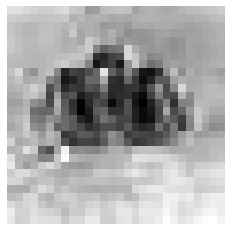

The above image belongs to the class name: Sandal


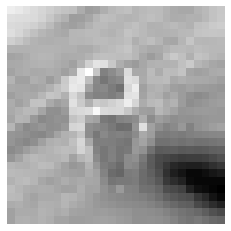

The above image belongs to the class name: Sandal


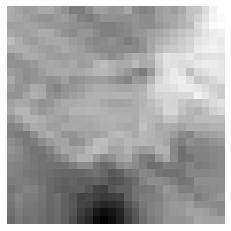

The above image belongs to the class name: Sandal


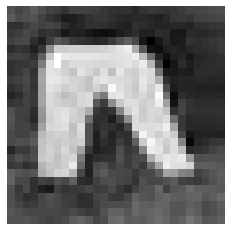

The above image belongs to the class name: Sandal


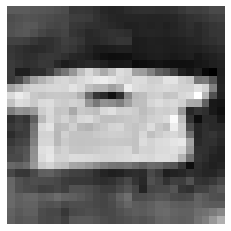

The above image belongs to the class name: Sandal


In [260]:
#running the testing with the new train model
rnd_prediction = my_rnd_clf.predict(grayimage_array)
print(rnd_prediction)
i=0
for i in range(5):
    gimage1 = grayimage_array[i]
    re_gimage1 = gimage1.reshape(28,28)
    plt.imshow(re_gimage1,cmap='binary')
    plt.axis('off')
    plt.show()
    pred_val_rnd = rnd_prediction[i] #predicted value
    print("The above image belongs to the class name: {}".format(class_names[pred_val_rnd]))
    i=i+1



[5 5 5 5 5]


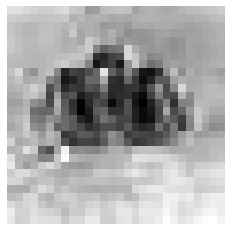

The above image belongs to the class name: Sandal


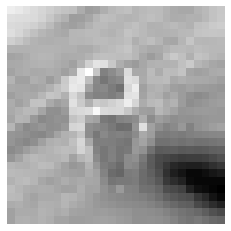

The above image belongs to the class name: Sandal


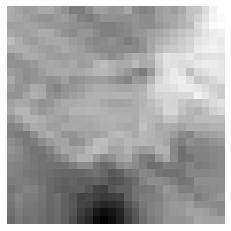

The above image belongs to the class name: Sandal


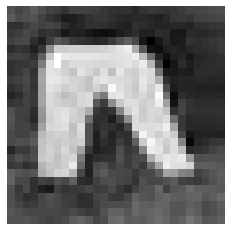

The above image belongs to the class name: Sandal


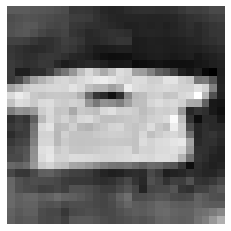

The above image belongs to the class name: Sandal


In [261]:
xgb_prediction = my_xgb_clf.predict(grayimage_array)
print(rnd_prediction)
i=0
for i in range(5):
    gimage1 = grayimage_array[i]
    re_gimage1 = gimage1.reshape(28,28)
    plt.imshow(re_gimage1,cmap='binary')
    plt.axis('off')
    plt.show()
    pred_val_xgb = xgb_prediction[i] #predicted value
    print("The above image belongs to the class name: {}".format(class_names[pred_val_xgb]))
    i=i+1

